<a href="https://colab.research.google.com/github/Ferdianap/python_for_datascience/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA

Link dataset : https://www.kaggle.com/datasets/yakubianacolyte/dataset-penjualan-sepeda-motor-bekas

Dataset ini berisi informasi tentang sepeda motor bekas, yang terdiri dari atribut seperti model, tahun, harga, transmisi, odometer, jenis, pajak, konsumsi bahan bakar, dan kapasitas mesin.

**Tujuan** : Dataset akan digunakan untuk membangun model clustering menggunakan DBSCAN agar dapat mengelompokkan sepeda motor ke dalam beberapa grup berdasarkan karakteristiknya(harga,tahun, odometer, dan mesin)

# Load Data

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
file_path = '/content/motor_second.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,model,tahun,harga,transmisi,odometer,jenis,pajak,konsumsiBBM,mesin
0,Supra X 125,2017,7999,Manual,17307,Bebek,145.0,58.9,125.0
1,Vario 125,2016,14499,Automatic,25233,Skuter,235.0,43.5,125.0
2,Vario 125,2016,11399,Automatic,37877,Skuter,30.0,61.7,125.0
3,Revo,2016,6499,Manual,23789,Bebek,20.0,60.1,110.0
4,PCX,2015,10199,Automatic,33177,Skuter,160.0,51.4,150.0


# Data Understanding

In [ ]:
data.shape

(199, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   model        199 non-null    object 
 1   tahun        199 non-null    int64  
 2   harga        199 non-null    int64  
 3   transmisi    199 non-null    object 
 4   odometer     199 non-null    int64  
 5   jenis        199 non-null    object 
 6   pajak        199 non-null    float64
 7   konsumsiBBM  199 non-null    float64
 8   mesin        198 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 14.1+ KB


In [ ]:
data.dtypes.value_counts()

,count
object,3
int64,3
float64,3


In [ ]:
data.describe()

,tahun,harga,odometer,pajak,konsumsiBBM,mesin
count,199.000000,199.000000,199.000000,199.000000,199.000000,198.000000
mean,2016.618090,11385.015075,23468.306533,110.395477,53.905528,123.914141
std,1.712955,4534.671984,15689.247247,63.600019,11.819869,16.821177
min,2011.000000,3799.000000,1391.000000,0.000000,28.000000,0.000000
25%,2016.000000,7996.500000,12696.000000,30.000000,44.800000,110.000000
50%,2017.000000,10998.000000,21119.000000,145.000000,56.500000,125.000000
75%,2018.000000,14498.500000,32103.000000,145.000000,60.100000,125.000000
max,2019.000000,34998.000000,119050.000000,300.000000,125.000000,150.000000


In [ ]:
# Mengecek nilai yang hilang (missing values)
data.isnull().sum()

,0
model,0
tahun,0
harga,0
transmisi,0
odometer,0
jenis,0
pajak,0
konsumsiBBM,0
mesin,1


# EDA

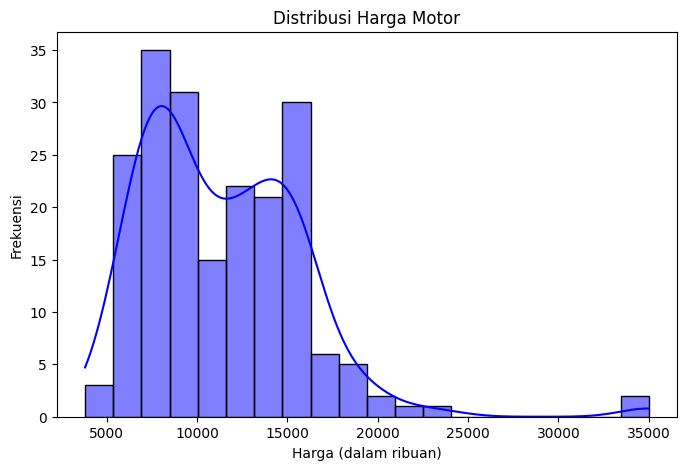

In [ ]:
#@title Distribusi harga motor
plt.figure(figsize=(8, 5))
sns.histplot(data['harga'], bins=20, kde=True, color='blue')
plt.title('Distribusi Harga Motor')
plt.xlabel('Harga (dalam ribuan)')
plt.ylabel('Frekuensi')
plt.show()

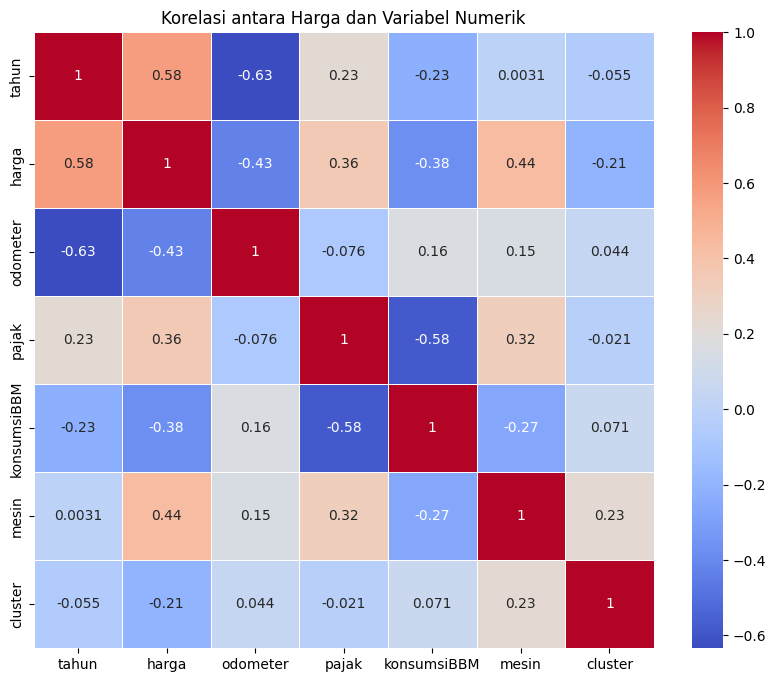

In [ ]:
#@title Korelasi antara harga dan variabel numerik lainnya
correlation_matrix = data.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi antara Harga dan Variabel Numerik')
plt.show()

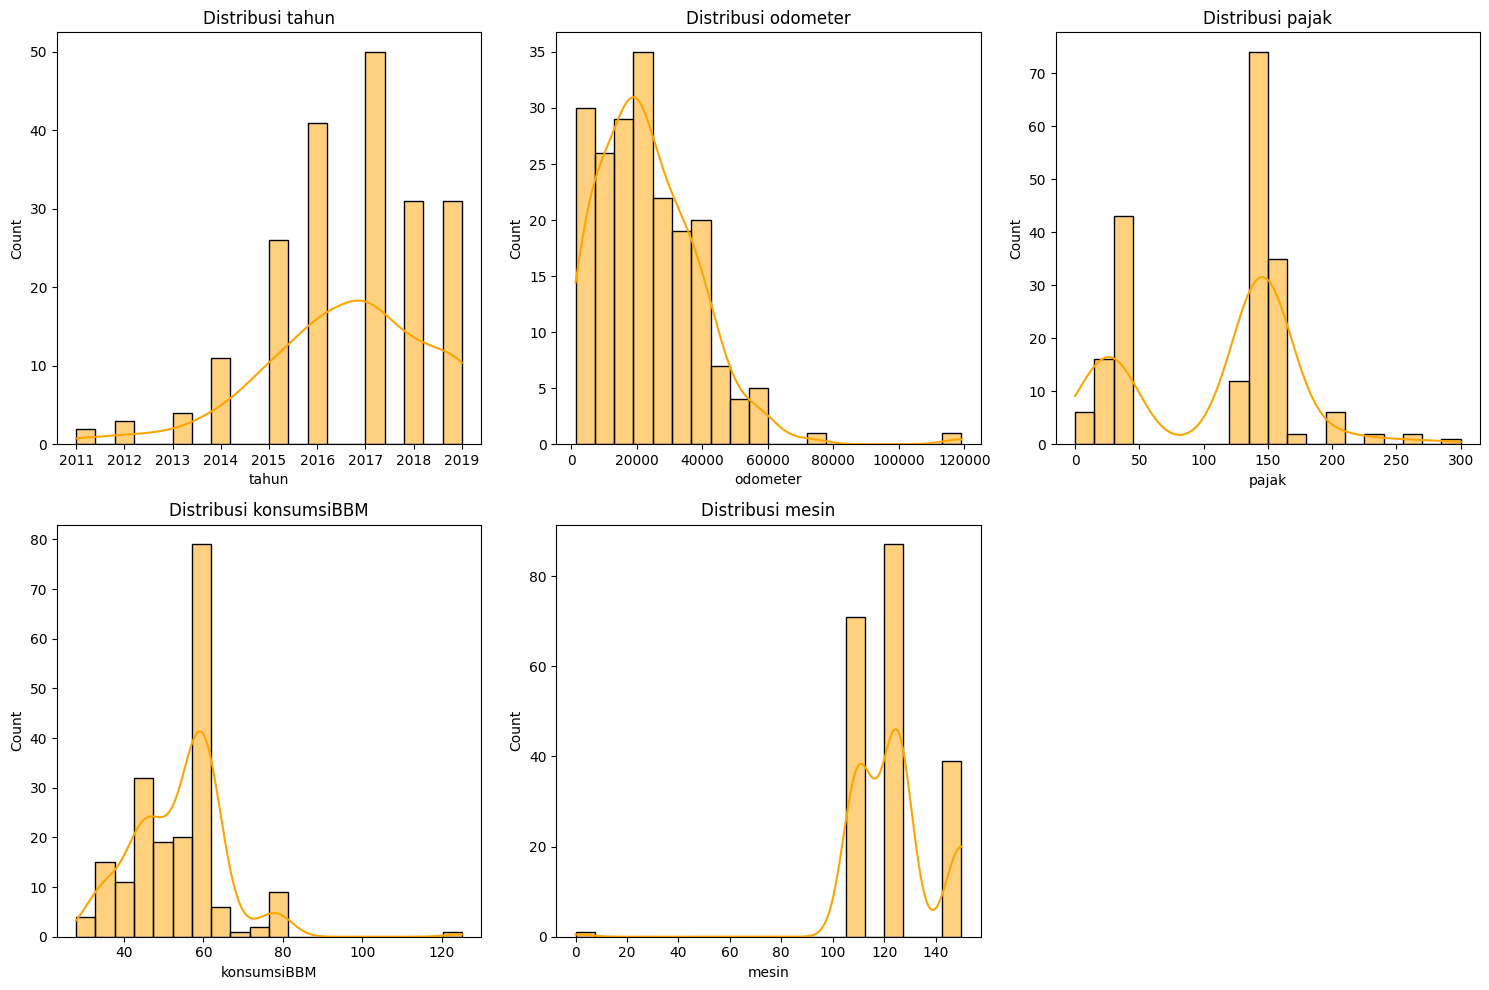

In [ ]:
#@title Distribusi data untuk variabel numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(['tahun', 'odometer', 'pajak', 'konsumsiBBM', 'mesin'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], bins=20, kde=True, color='orange')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

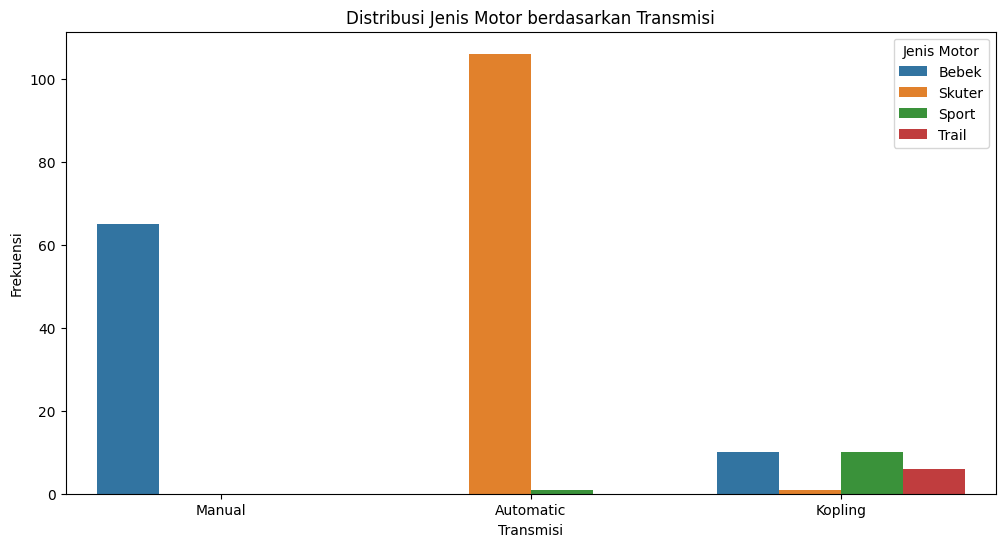

(             tahun         harga       odometer       pajak  konsumsiBBM  \
 count   199.000000    199.000000     199.000000  199.000000   199.000000   
 mean   2016.618090  11385.015075   23468.306533  110.395477    53.905528   
 std       1.712955   4534.671984   15689.247247   63.600019    11.819869   
 min    2011.000000   3799.000000    1391.000000    0.000000    28.000000   
 25%    2016.000000   7996.500000   12696.000000   30.000000    44.800000   
 50%    2017.000000  10998.000000   21119.000000  145.000000    56.500000   
 75%    2018.000000  14498.500000   32103.000000  145.000000    60.100000   
 max    2019.000000  34998.000000  119050.000000  300.000000   125.000000   
 
             mesin  
 count  198.000000  
 mean   123.914141  
 std     16.821177  
 min      0.000000  
 25%    110.000000  
 50%    125.000000  
 75%    125.000000  
 max    150.000000  ,
                 tahun     harga  odometer     pajak  konsumsiBBM     mesin
 tahun        1.000000  0.572155 -0.634

In [ ]:
#@title Distribusi data berdasarkan jenis transmisi dan jenis motor
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='transmisi', hue='jenis')
plt.title('Distribusi Jenis Motor berdasarkan Transmisi')
plt.xlabel('Transmisi')
plt.ylabel('Frekuensi')
plt.legend(title='Jenis Motor')
plt.show()

stats_summary, correlation_matrix

# Feature Engineering

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#@title Mengisi nilai kosong di kolom mesin dengan nilai median
data['mesin'].fillna(data['mesin'].median(), inplace=True)

<ipython-input-15-4dbe8125763e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['mesin'].fillna(data['mesin'].median(), inplace=True)


In [ ]:
#@title Menghapus data dengan nilai mesin = 0 (anomali)
data = data[data['mesin'] > 0]

In [ ]:
#@title Normalisasi fitur numerik yang relevan untuk clustering
features = ['harga', 'tahun', 'odometer', 'mesin']
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data[features]), columns=features)

In [ ]:
#@title Menambahkan kembali kolom kategori untuk analisis
data_normalized['transmisi'] = data['transmisi'].reset_index(drop=True)
data_normalized['jenis'] = data['jenis'].reset_index(drop=True)

In [ ]:
# Menampilkan data hasil normalisasi
data_normalized.head()

,harga,tahun,odometer,mesin,transmisi,jenis
0,0.134620,0.750,0.135272,0.375,Manual,Bebek
1,0.342960,0.625,0.202636,0.375,Automatic,Skuter
2,0.243598,0.625,0.310100,0.375,Automatic,Skuter
3,0.086541,0.625,0.190364,0.000,Manual,Bebek
4,0.205135,0.500,0.270154,1.000,Automatic,Skuter


# Modeling DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Inisialisasi DBSCAN dengan parameter default (akan disesuaikan berdasarkan hasil eksplorasi)
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(data_normalized[['harga', 'tahun', 'odometer', 'mesin']])

# Menambahkan hasil cluster ke dalam data asli
data['cluster'] = clusters

# Jumlah data per cluster
cluster_counts = data['cluster'].value_counts()

# Menampilkan distribusi cluster
cluster_counts

<ipython-input-25-a6a68b2f53ca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = clusters


,count
cluster,
0,88
1,70
2,33
-1,7


# Evaluasi Model

In [ ]:
#@title Evaluasi menggunakan Silhouette Score untuk mengevaluasi kualitas cluster

# Assuming data_cleaned is meant to be data_normalized
silhouette_avg = silhouette_score(data_normalized.select_dtypes(include=['number']), data['cluster'])
# Replace optimal_k with a descriptive string, as it's not used for DBSCAN
print(f"Silhouette Score untuk clustering DBSCAN: {silhouette_avg:.2f}")

Silhouette Score untuk clustering DBSCAN: 0.42


Silhouette Score untuk clustering DBSCAN: 0.42 yang menunjukkan clustering cukup baik tetapi belum ideal

In [ ]:
# Add the 'cluster' column to data_normalized
data_normalized['cluster'] = data['cluster']

#@title Interpretasi
# Get the unique cluster labels and the number of clusters
unique_clusters = data['cluster'].unique()
num_clusters = len(unique_clusters)

for cluster in range(num_clusters):
    cluster_data = data_normalized[data_normalized["cluster"] == unique_clusters[cluster]]
    print(f"Cluster {unique_clusters[cluster]}:")
    print(cluster_data.describe())

Cluster 0:
           harga      tahun   odometer      mesin  cluster
count  88.000000  88.000000  88.000000  88.000000     88.0
mean    0.261023   0.711648   0.169892   0.345170      0.0
std     0.132584   0.194536   0.102744   0.273989      0.0
min     0.038495   0.000000   0.000391   0.000000      0.0
25%     0.140654   0.625000   0.091287   0.281250      0.0
50%     0.275089   0.750000   0.164089   0.375000      0.0
75%     0.358954   0.875000   0.243662   0.375000      0.0
max     0.631398   1.000000   0.406114   1.000000      0.0
Cluster 1:
           harga      tahun   odometer      mesin  cluster
count  70.000000  70.000000  70.000000  70.000000     70.0
mean    0.227060   0.703571   0.205255   0.330357      1.0
std     0.120970   0.232320   0.162718   0.399862      0.0
min     0.038495   0.000000   0.000000   0.000000      1.0
25%     0.125829   0.625000   0.098439   0.000000      1.0
50%     0.209959   0.750000   0.170909   0.187500      1.0
75%     0.329354   0.875000   0.28

1. Cluster 0 (Cluster Utama)
Jumlah Data: 88 data

Mean:
- Harga: 0.261
- Tahun: 0.711
- Odometer: 0.169
- Mesin: 0.345

Interpretasi:
Cluster ini mewakili motor dengan harga relatif rendah hingga menengah, dengan tahun yang cenderung baru (tahun sekitar 2015-2016), dan odometer (jarak tempuh) yang tidak terlalu tinggi.
Motor-motor ini bisa dianggap cukup terjaga kondisinya dan lebih terjangkau bagi pembeli yang ingin motor yang masih layak pakai tetapi dengan harga yang tidak terlalu tinggi.
Sebagian besar motor dalam cluster ini mungkin lebih cocok untuk pembeli yang mencari kendaraan dengan performa baik namun tidak ingin mengeluarkan biaya besar.

2. Cluster 1 (Cluster Utama)
Jumlah Data: 70 data

Mean:
- Harga: 0.227
- Tahun: 0.703
- Odometer: 0.205
- Mesin: 0.330

Interpretasi:
Cluster ini mewakili motor yang juga memiliki harga rendah hingga menengah, dengan kondisi yang sedikit lebih tua dibandingkan Cluster 0, namun masih relatif layak.
Motor pada cluster ini memiliki jarak tempuh yang sedikit lebih tinggi, namun tetap dalam kondisi yang bisa diterima dengan harga yang lebih terjangkau.
Motor dalam cluster ini cocok untuk pembeli dengan anggaran terbatas namun membutuhkan motor yang masih dalam kondisi baik untuk penggunaan sehari-hari.

3. Cluster 2 (Cluster Utama)
Jumlah Data: 32 data

Mean:
- Harga: 0.198
- Tahun: 0.625
- Odometer: 0.230
- Mesin: 0.480

Interpretasi:
Cluster ini mewakili motor dengan harga cenderung lebih rendah, namun memiliki usia yang sedikit lebih tua (mungkin sekitar tahun 2013-2014).
Meskipun harga motor dalam cluster ini rendah, performa mesin masih cukup baik, dengan beberapa motor memiliki mesin yang lebih kuat dan kondisi yang lebih terjaga meskipun sudah berusia lebih tua.
Cluster ini cocok untuk pembeli yang mencari motor dengan harga sangat terjangkau, tetapi masih ingin motor yang memiliki performa mesin cukup baik untuk kebutuhan sehari-hari.

4. Cluster -1 (Noise)
Jumlah Data: 7 data

Mean:
- Harga: 0.384
- Tahun: 0.857
- Odometer: 0.080
- Mesin: 0.446

Interpretasi:
Cluster ini berisi data yang dianggap noise atau anomali oleh DBSCAN, yang tidak cukup dekat dengan cluster lainnya untuk dapat dimasukkan ke dalam kategori utama.
Motor dalam cluster ini memiliki harga lebih tinggi, namun usianya lebih baru dan odometer-nya relatif rendah. Bisa jadi ini adalah motor yang lebih mahal namun sangat sedikit data yang masuk dalam kelompok ini, mungkin karena memiliki karakteristik yang sangat berbeda dari mayoritas data lainnya.
Meskipun motor dalam cluster ini terlihat layak dan dalam kondisi baik, mereka tidak cukup sering muncul dalam dataset untuk membentuk cluster yang lebih besar.